In [1]:
path = "../input/scene_classification/scene_classification/train/"

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
bs = 64

In [4]:
df = pd.read_csv('../input/scene_classification/scene_classification/train.csv')
df.head()

,image_name,label
0,0.jpg,0
1,1.jpg,4
2,2.jpg,5
3,4.jpg,0
4,7.jpg,4


In [5]:
tfms = get_transforms(do_flip=True)
data = (ImageItemList.from_csv(path, csv_name='../train.csv') #Where to find the data? -> in path and its subfolders
        .random_split_by_pct()              #How to split in train/valid? -> use the folders
        .label_from_df()            #How to label? -> depending on the folder of the filenames
        .add_test_folder(test_folder = '../test')              #Optionally add a test set (here default name is test)
        .transform(tfms, size=128)       #Data augmentation? -> use tfms with a size of 64
        .databunch())

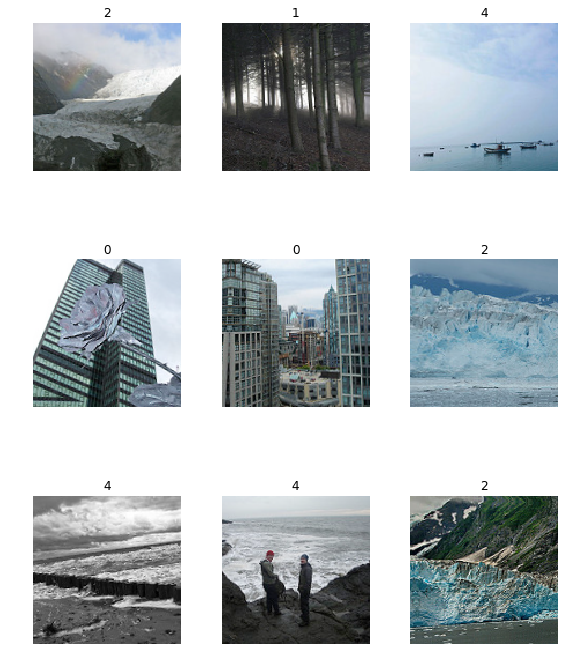

In [6]:
data.show_batch(rows=3, figsize=(8,10))

In [7]:
print(data.classes)

[0, 1, 2, 3, 4, 5]


In [8]:
learn = create_cnn(data, models.resnet101, metrics=[error_rate, accuracy], model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /tmp/.torch/models/resnet101-5d3b4d8f.pth
100%|██████████| 178728960/178728960 [00:02<00:00, 86882541.29it/s]


In [9]:
learn.fit_one_cycle(25)

epoch,train_loss,valid_loss,error_rate,accuracy
1,0.455185,0.305711,0.108632,0.891368
2,0.388740,0.272911,0.097769,0.902231
3,0.337562,0.246728,0.095420,0.904580
4,0.278535,0.229477,0.083969,0.916031
5,0.261645,0.215858,0.078685,0.921315
6,0.248337,0.211787,0.073106,0.926894
7,0.218746,0.208574,0.078685,0.921315
8,0.206213,0.200517,0.067528,0.932472
9,0.184087,0.190884,0.066060,0.933940
10,0.171332,0.186650,0.058133,0.941867


In [10]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

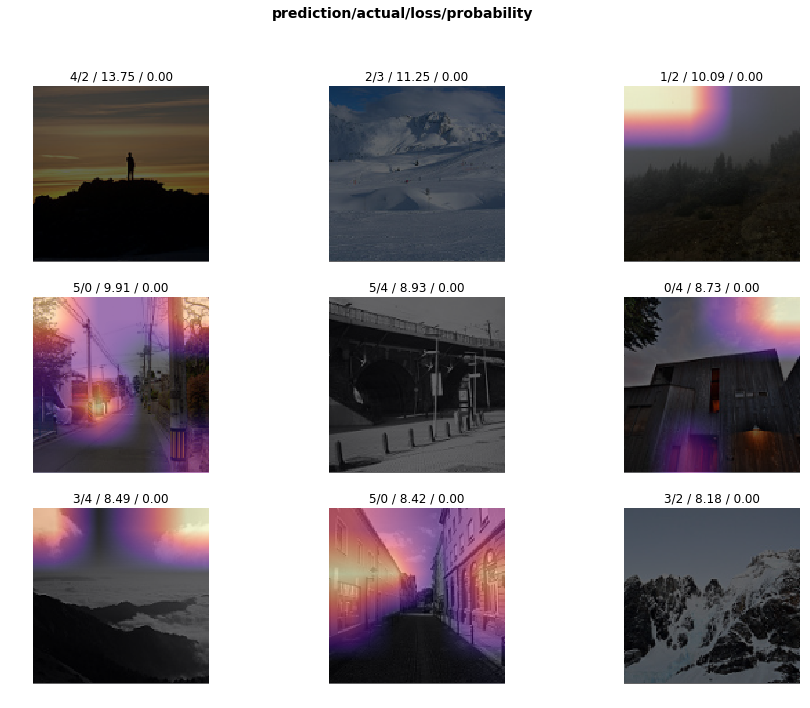

In [11]:
interp.plot_top_losses(9, figsize=(15,11))

In [12]:
interp.most_confused(min_val=2)

[(3, 2, 51),
 (2, 3, 49),
 (0, 5, 36),
 (5, 0, 13),
 (2, 4, 11),
 (4, 3, 7),
 (3, 4, 6),
 (4, 2, 6),
 (0, 4, 4),
 (2, 1, 3),
 (4, 0, 3),
 (4, 1, 3),
 (4, 5, 3)]

In [13]:
learn.save('stage-1')

In [14]:
learn.unfreeze()

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.92E-06


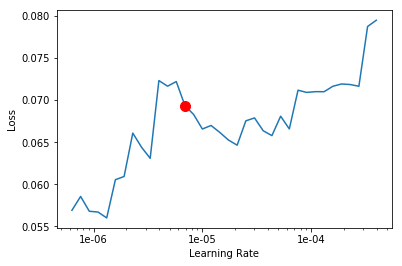

In [16]:
learn.recorder.plot()

In [17]:
learn.unfreeze()

In [18]:
learn.fit_one_cycle(5, max_lr=slice(1e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,accuracy
1,0.089820,0.273184,0.068996,0.931004
2,0.159149,0.222873,0.065766,0.934234
3,0.118468,0.211645,0.066647,0.933353
4,0.061460,0.201625,0.059014,0.940987
5,0.041945,0.193403,0.055784,0.944216


In [19]:
learn.save('stage-2')

In [20]:
preds,_ = learn.get_preds(ds_type=DatasetType.Test)

In [21]:
labelled_preds = []
for pred in preds:
    labelled_preds.append(int(np.argmax(pred)))
    
# labelled_preds[0:10]
len(labelled_preds)

7301

In [22]:
import os
filenames = os.listdir('../input/scene_classification/scene_classification/test/')

In [23]:
len(filenames) == len(labelled_preds)

True

In [24]:
submission = pd.DataFrame(
    {'image_name': filenames,
     'label': labelled_preds,
    })

In [25]:
y_test = submission
image_name = list(submission['image_name'])
label = list(submission['label'])
for i in range(len(submission)):
    for j in range(len(submission)):
        if i%1000 == 0:
            print(i)
        if j+1 < len(submission) and int(image_name[j][:-4]) > int(image_name[j+1][:-4]) :
            temp = image_name[j]
            image_name[j] = image_name[j+1]
            image_name[j+1] = temp
            
            tempPrime =  label[j]
            label[j] = label[j+1]
            label[j+1] = tempPrime

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [26]:
y_test['image_name'] = pd.DataFrame(image_name)
y_test['label'] = pd.DataFrame(label)

In [27]:
y_test.to_csv('Scene5.csv')

In [28]:
y_test.head()

,image_name,label
0,3.jpg,5
1,5.jpg,0
2,6.jpg,4
3,11.jpg,2
4,14.jpg,5
